In [2]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', -1)

In [23]:
data = pd.read_csv('crime_data.csv')
data.shape


(50, 5)

In [24]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
data.rename({'Unnamed: 0':'States'},axis=1,inplace=True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Exploration

In [7]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
# Missing Values :

In [10]:
null_count_col = data.isnull().sum().value_counts(ascending=False)
null_count_col

0    5
dtype: int64

In [11]:
# Duplicated values 

In [12]:
data.duplicated().sum()

0

# Exploratory Data Analysis

In [13]:
data = data.drop(['States'], axis=1)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


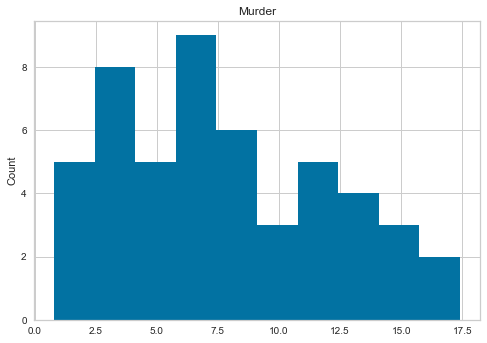

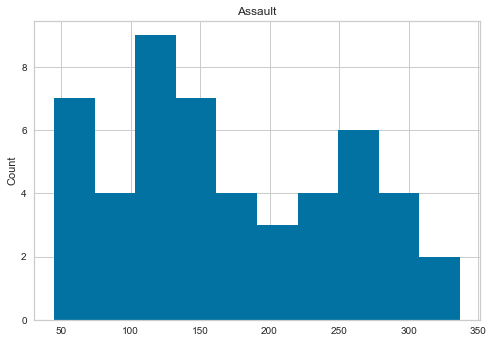

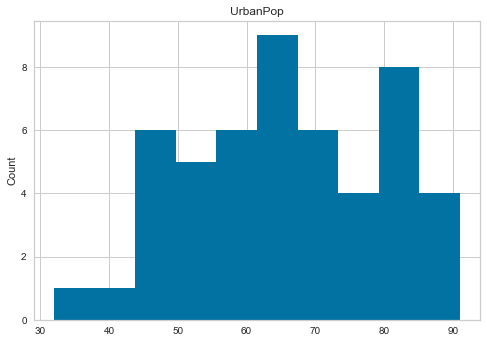

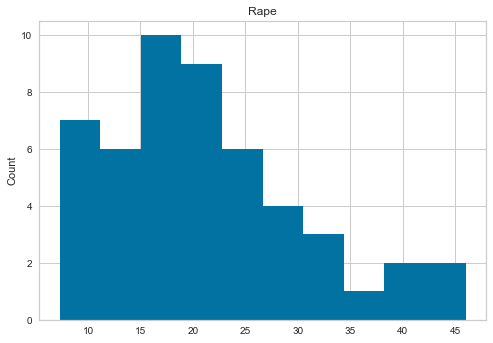

In [14]:
for feature in data.columns:
    data = data.copy()
    data[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


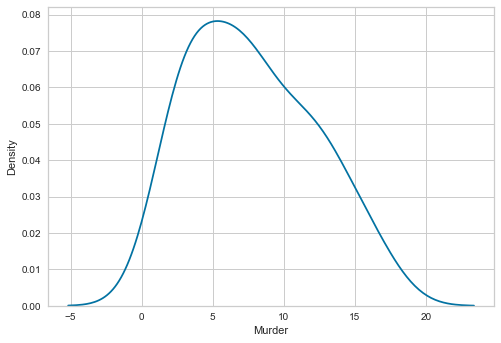

Assault


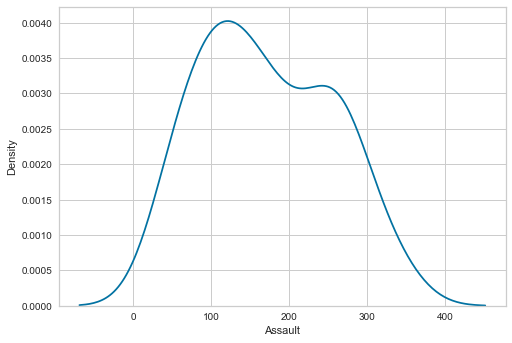

UrbanPop


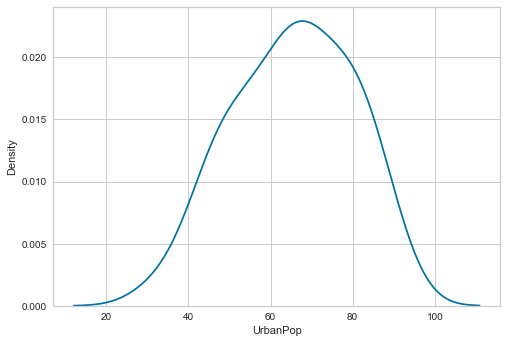

Rape


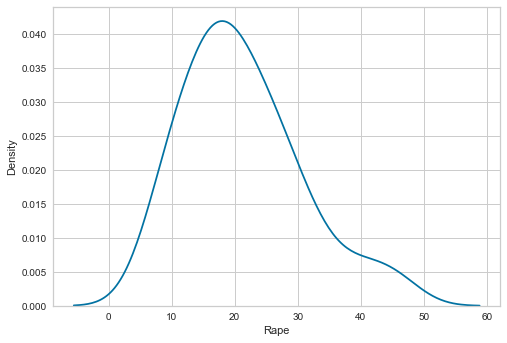

In [15]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

# Outliers Detection

In [16]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

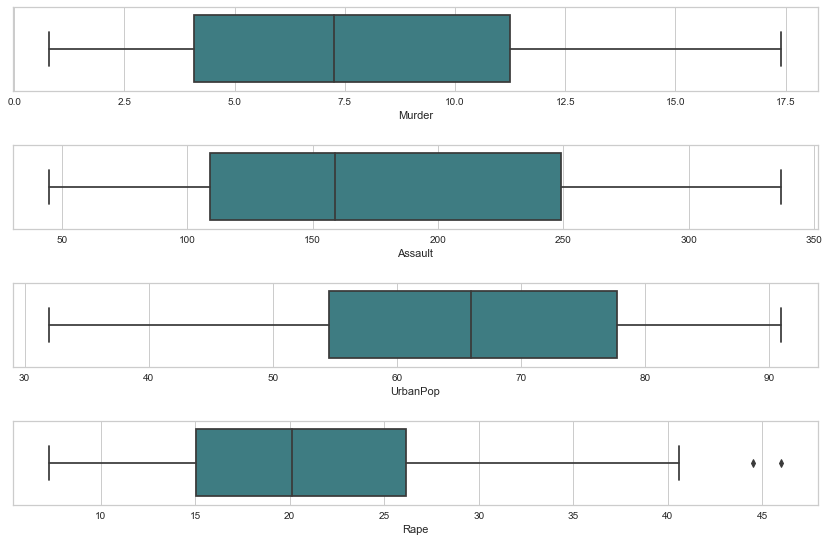

In [18]:
ot = data.copy()
fig, axes = plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

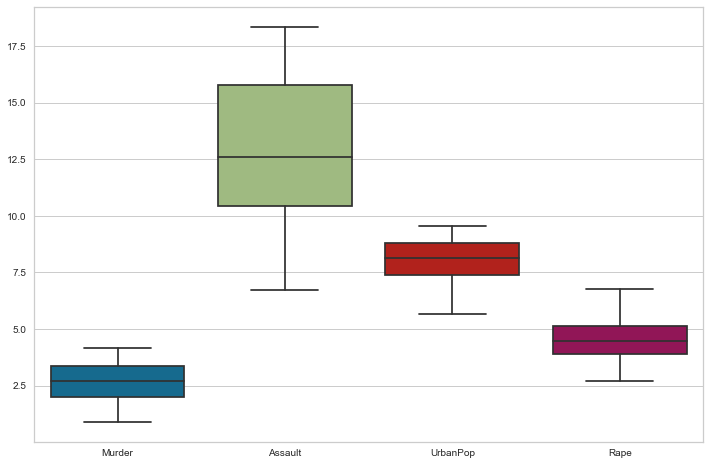

In [19]:
# Using SQRT to check outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

# Data Visualization

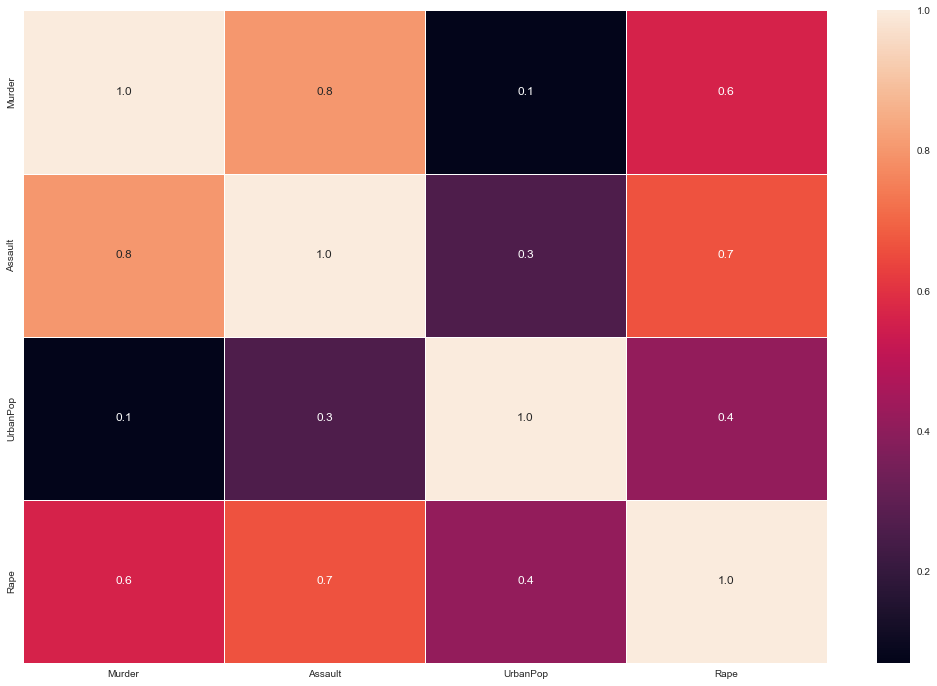

In [20]:
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

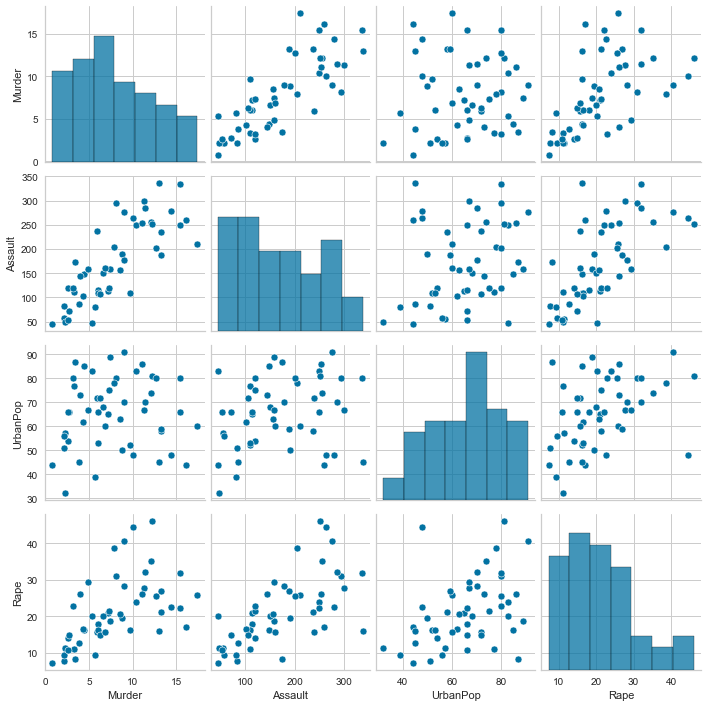

In [21]:
sns.pairplot(data)

# Murder Rate :

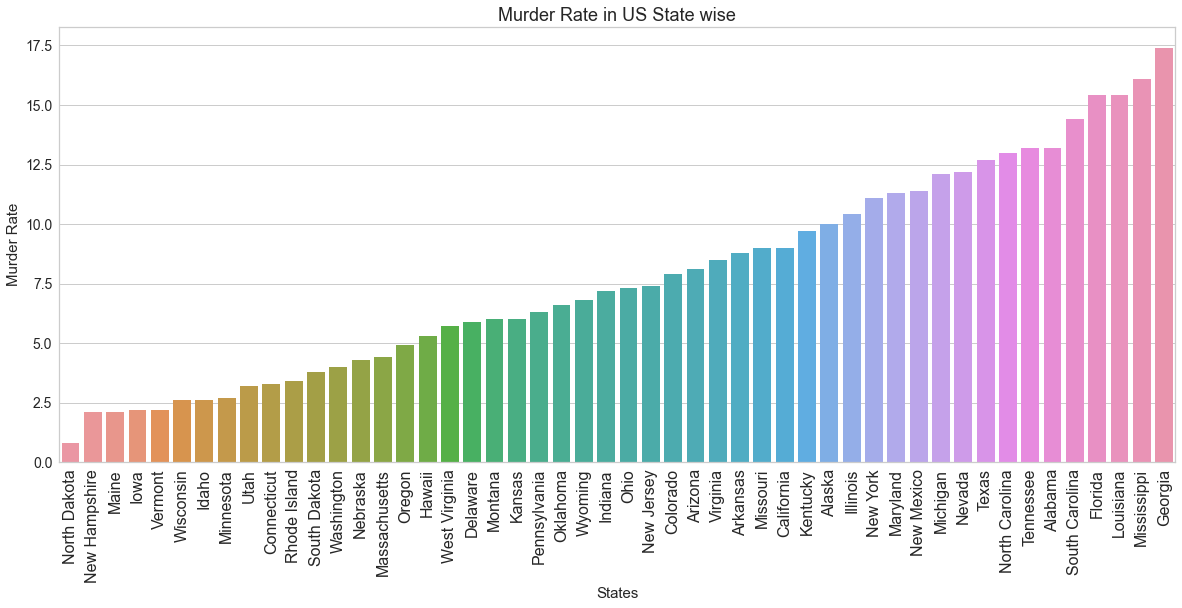

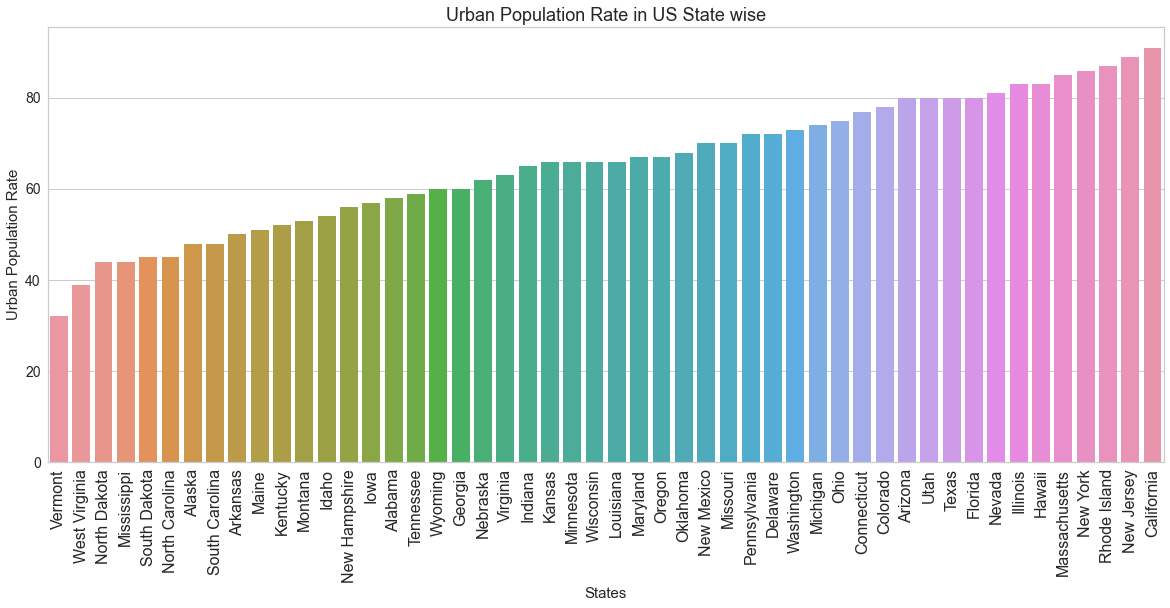

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',
            y="Murder", 
            data=data, 
            order=data.sort_values('Murder').States)

plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))

sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)

plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [27]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [44]:
murder = data.sort_values('Murder',ascending=False,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


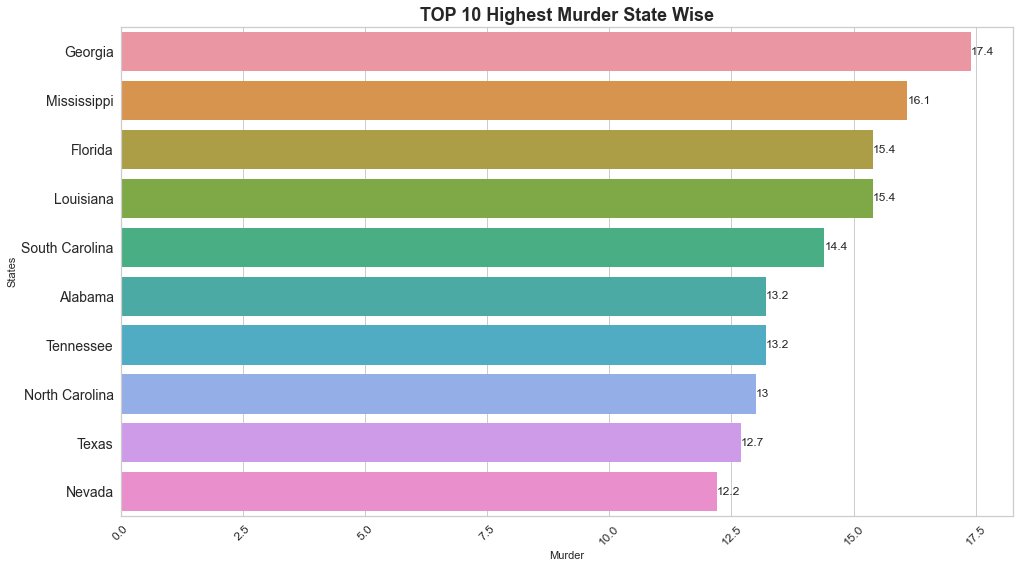

In [32]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=murder.Murder[:10],y=murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('TOP 10 Highest Murder State Wise',fontsize=18,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)

In [47]:
murder = data.sort_values('Murder',ascending=True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


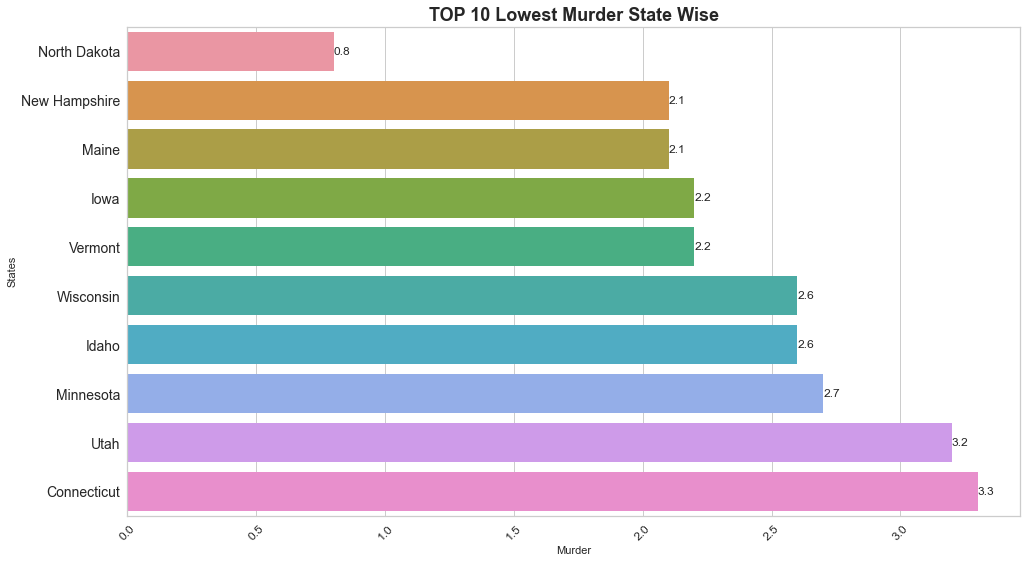

In [39]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=murder.Murder[:10],y=murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('TOP 10 Lowest Murder State Wise',fontsize=18,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)

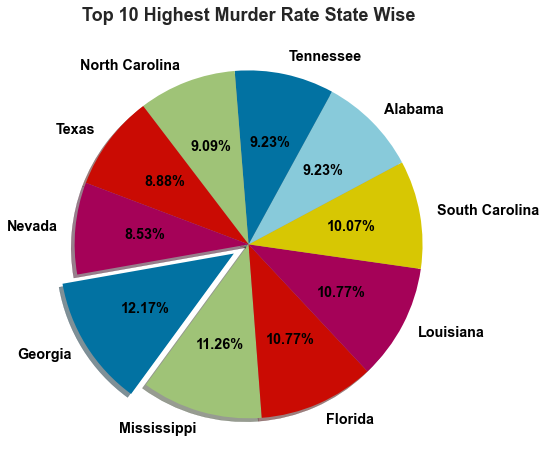

In [45]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

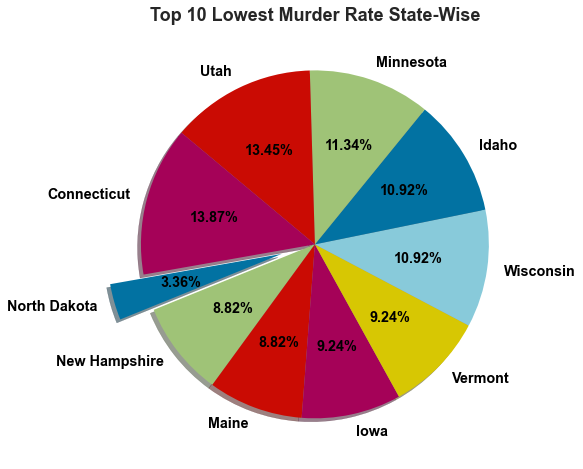

In [48]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

# Assualt Rate

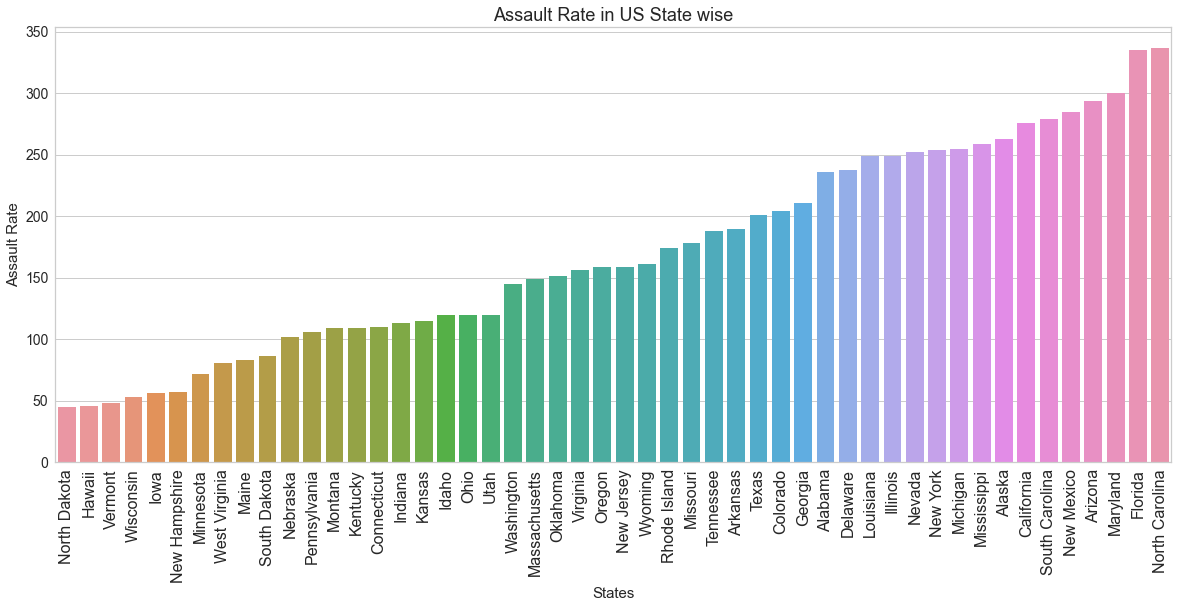

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').States)

plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [52]:
Assault = data.sort_values('Assault', ascending = False)

In [53]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


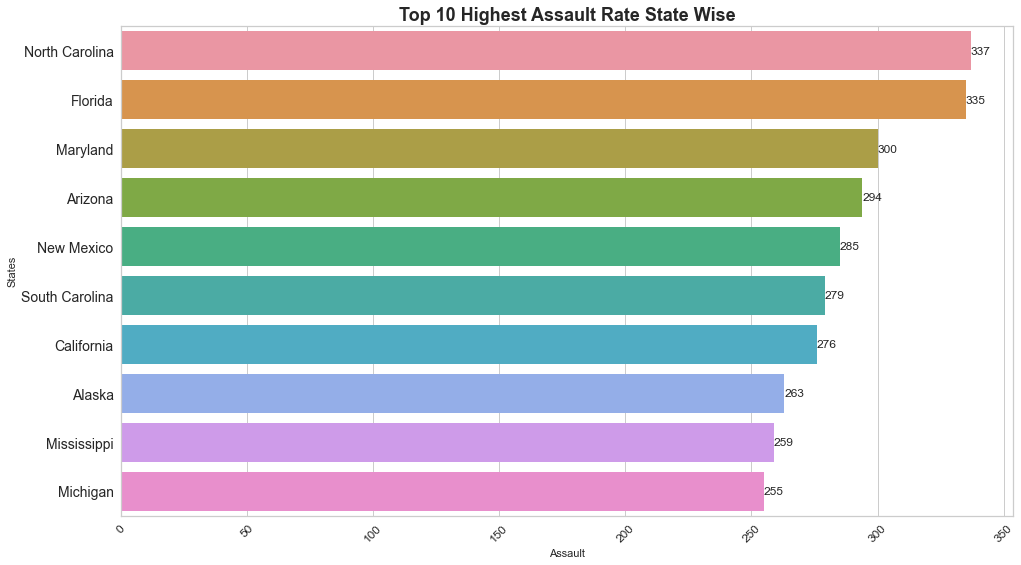

In [54]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

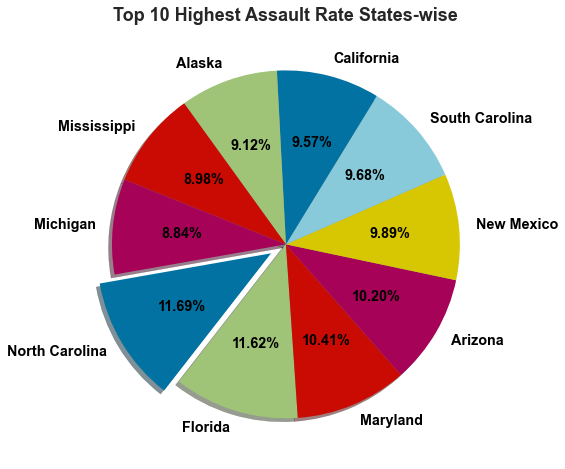

In [55]:
plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

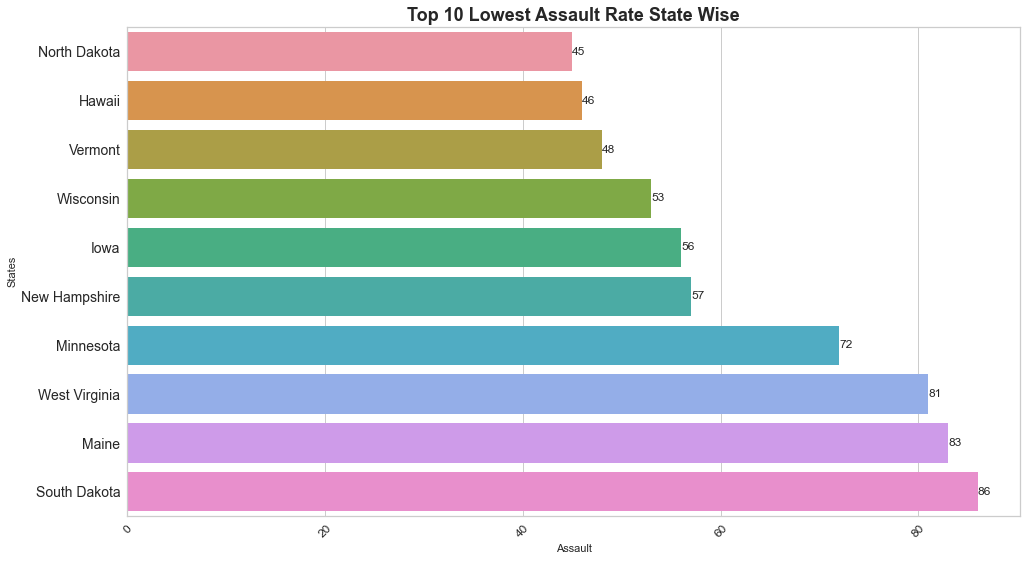

In [56]:
assault = data.sort_values('Assault', ascending = True)
plt.figure(figsize = (16,9))
ax = sns.barplot(x = assault.Assault[:10], y = assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


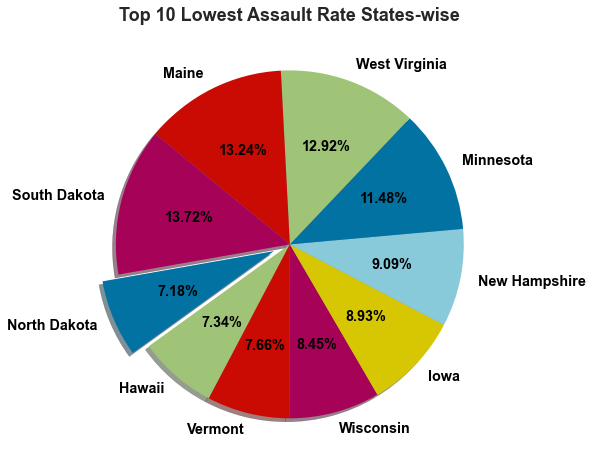

In [57]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

# Rape Rate

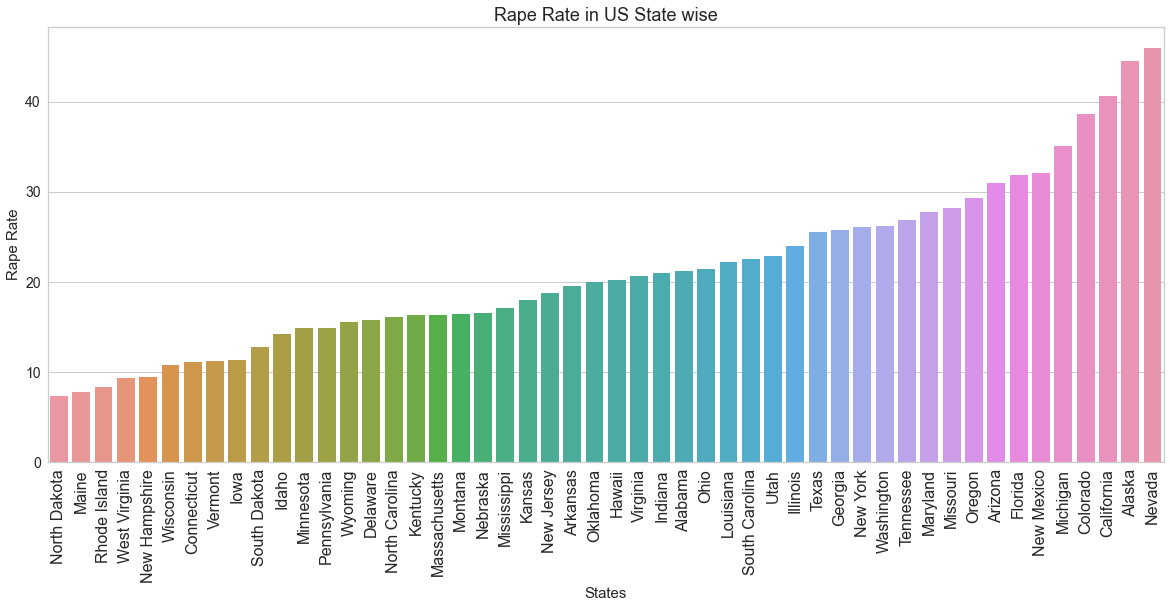

In [58]:
plt.figure(figsize=(20,8))

sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)

plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [59]:
print('Top 10 States with Highest Rape Rate')
data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [60]:
print('Top 10 States with Lowest Rape Rate')

data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


In [61]:
Rape = data.sort_values('Rape', ascending = False)

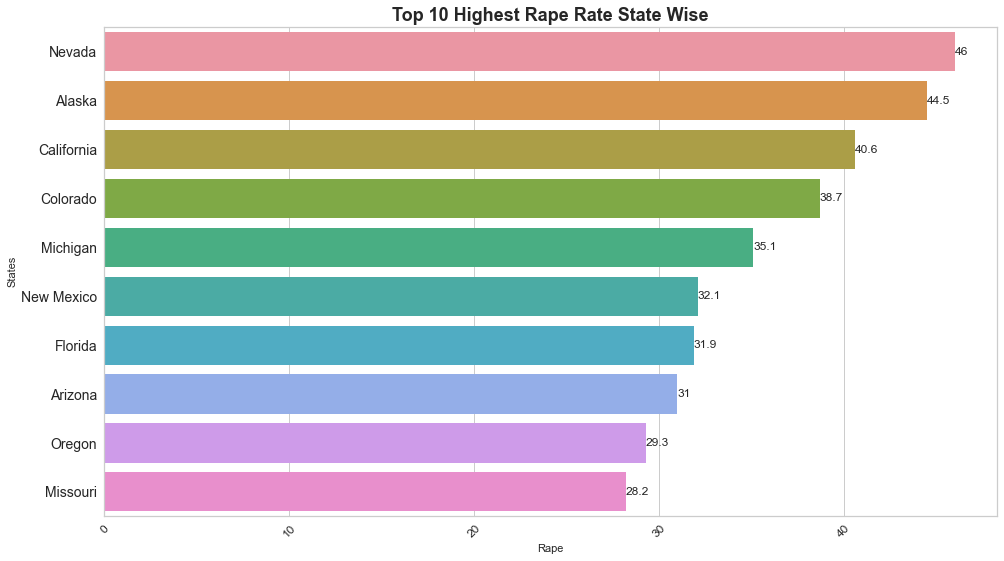

In [62]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


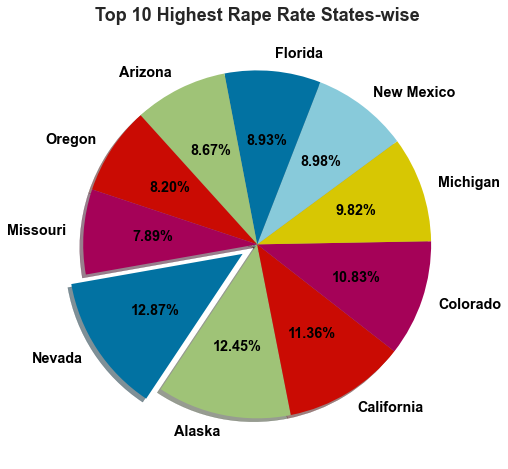

In [63]:
plt.figure(figsize = (8,8))
plt.pie(Rape.Rape[:10],
       labels=Rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [64]:
rape = data.sort_values('Rape', ascending = True)

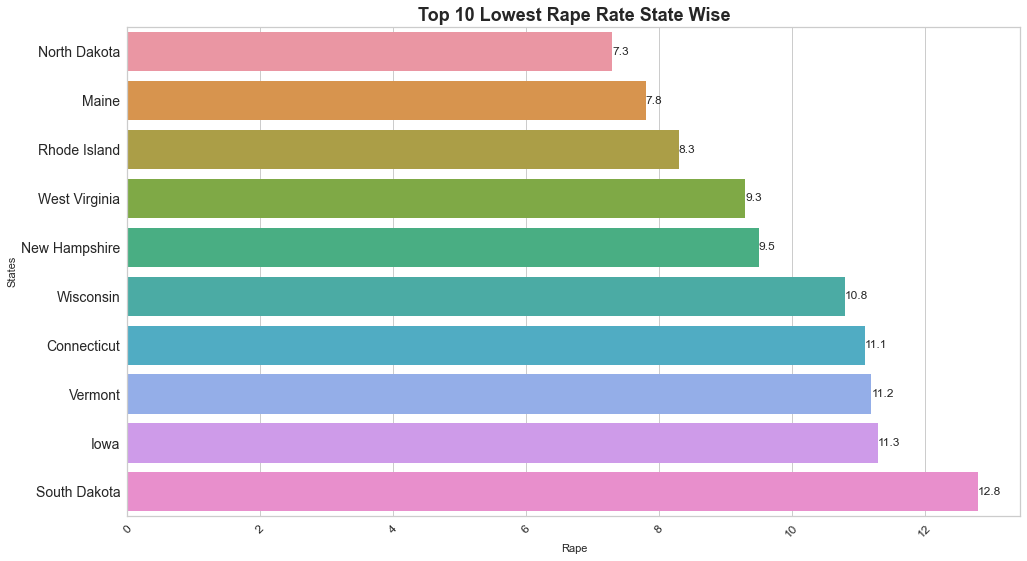

In [65]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

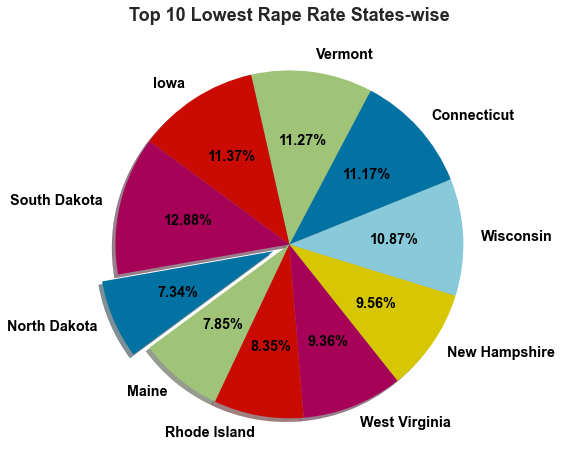

In [66]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

# Urban Population Rate

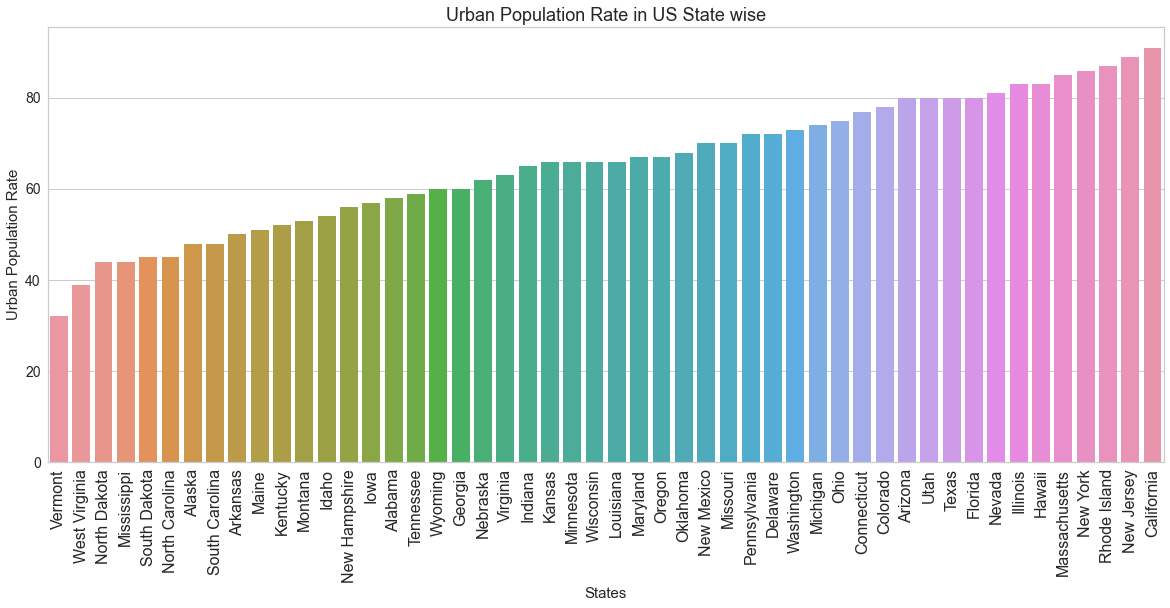

In [67]:
plt.figure(figsize=(20,8))

sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)

plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [68]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [69]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


In [70]:
urbanpop = data.sort_values('UrbanPop', ascending = False)

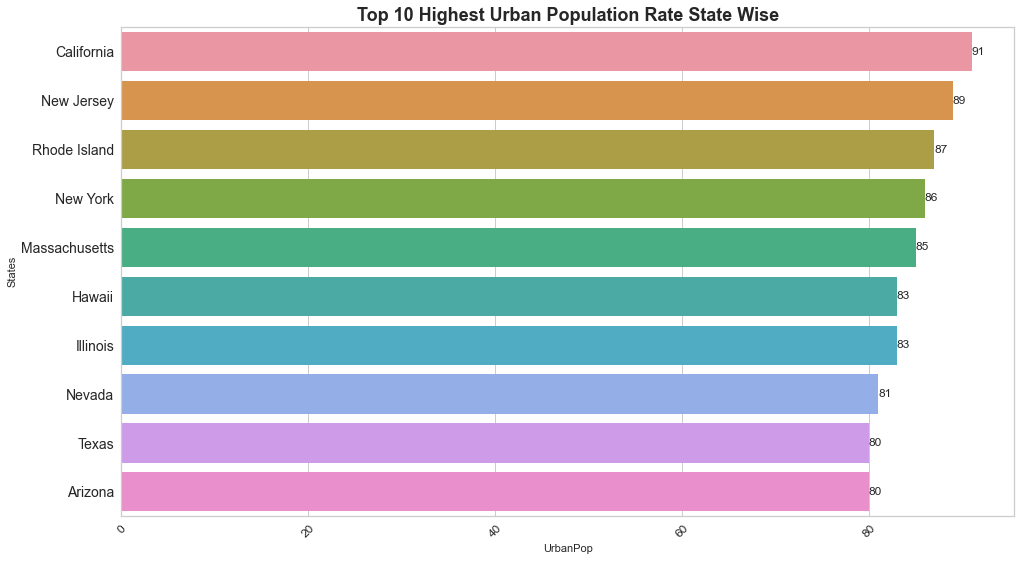

In [71]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

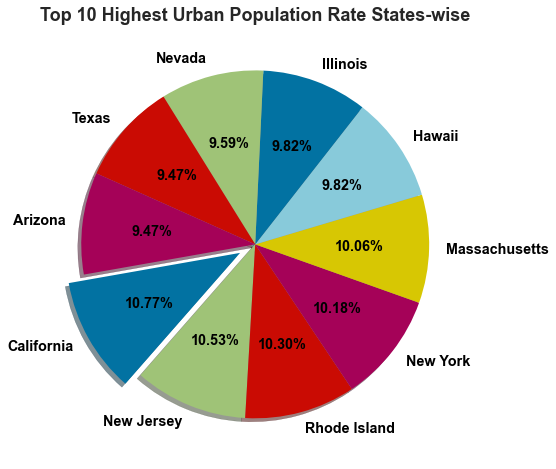

In [72]:
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [73]:
UrbanPop = data.sort_values('UrbanPop', ascending = True)

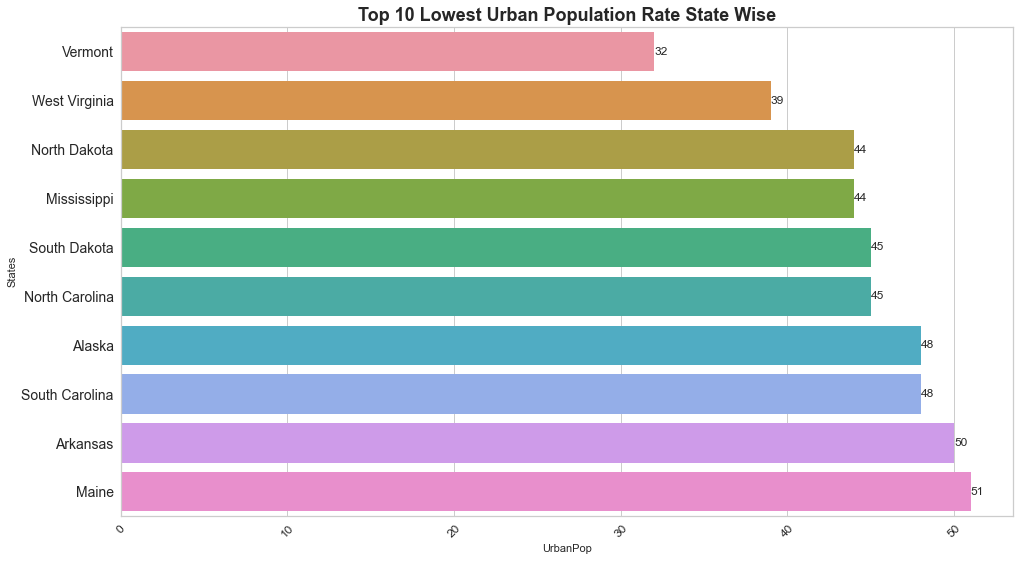

In [74]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

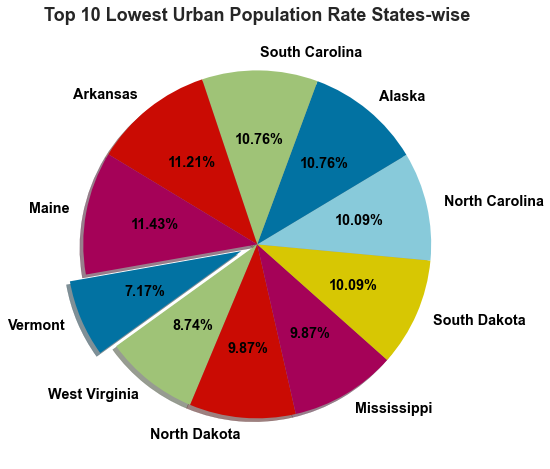

In [75]:
plt.figure(figsize = (8,8))
plt.pie(UrbanPop.UrbanPop[:10],
       labels=UrbanPop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Preprocessing

In [76]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [77]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [80]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# KMeans Clustering
























In [81]:
# Elbow Method for Determining cluster amount

In [83]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.076563
5,6,44.008574
6,7,40.216358
7,8,34.687388
8,9,30.876621
9,10,27.662706


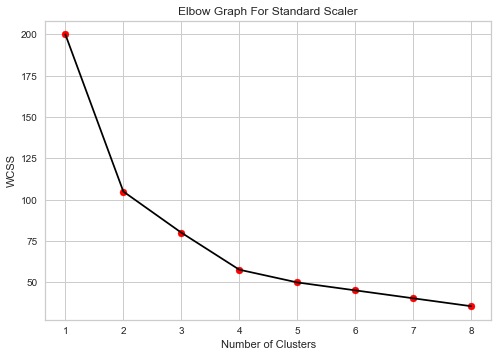

In [84]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph For Standard Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

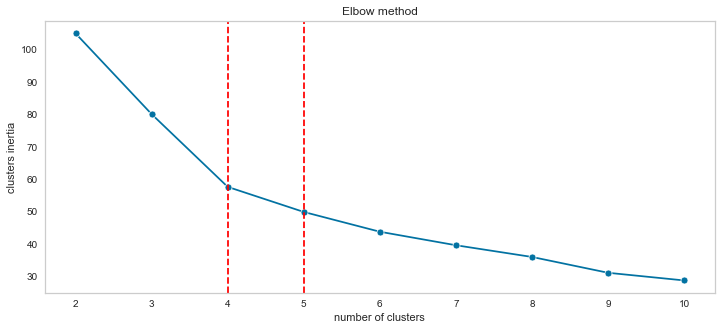

In [85]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] 
clusters_inertia = [] 
s_scores = [] 

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()


# Silhouette Score

Elbow Plot For Standard Scaler Data


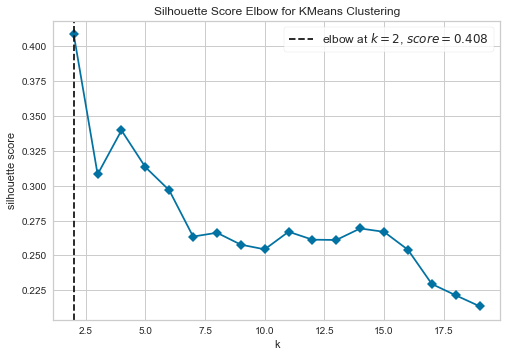

In [88]:
model = KMeans(random_state=10, max_iter=500,init = 'k-means++')

visualizer = KElbowVisualizer(model,k=(2,20),metric = 'silhouette',timings=False)

print('Elbow Plot For Standard Scaler Data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

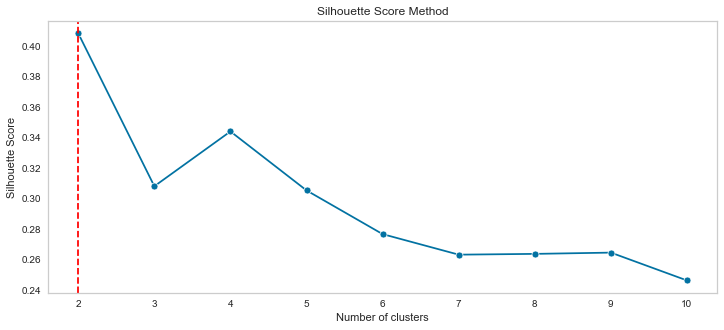

In [90]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores,marker='o',ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2,ls="--",c="red")
plt.grid()
plt.show()

In [92]:
clust_list=[2,3,4,5,6,7,8,9]

# Silhouette score for StaqndardScaler 
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1 = sil(std_df,cluster_labels1)
    print("For n_clusters = ",n_clusters,"The average silhouette score is :",sil_score1)

For n_clusters =  2 The average silhouette score is : 0.4084890326217641
For n_clusters =  3 The average silhouette score is : 0.3095091512791688
For n_clusters =  4 The average silhouette score is : 0.33968891433344395
For n_clusters =  5 The average silhouette score is : 0.30612803169146263
For n_clusters =  6 The average silhouette score is : 0.29910456843899946
For n_clusters =  7 The average silhouette score is : 0.23035904501364116
For n_clusters =  8 The average silhouette score is : 0.2732934287338534
For n_clusters =  9 The average silhouette score is : 0.2518939934580804


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


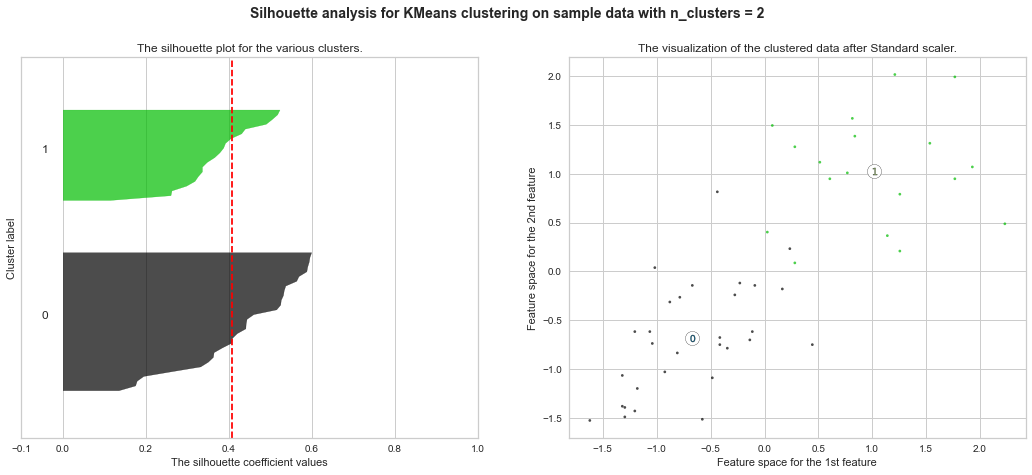

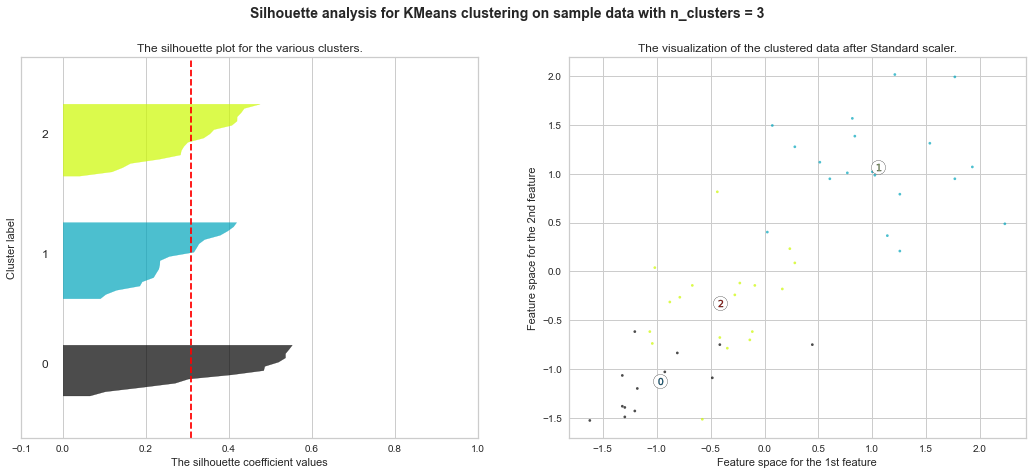

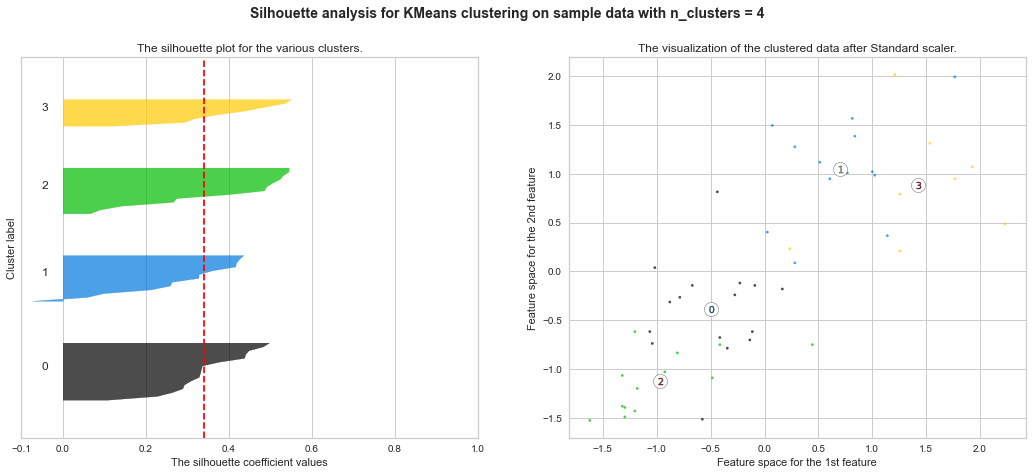

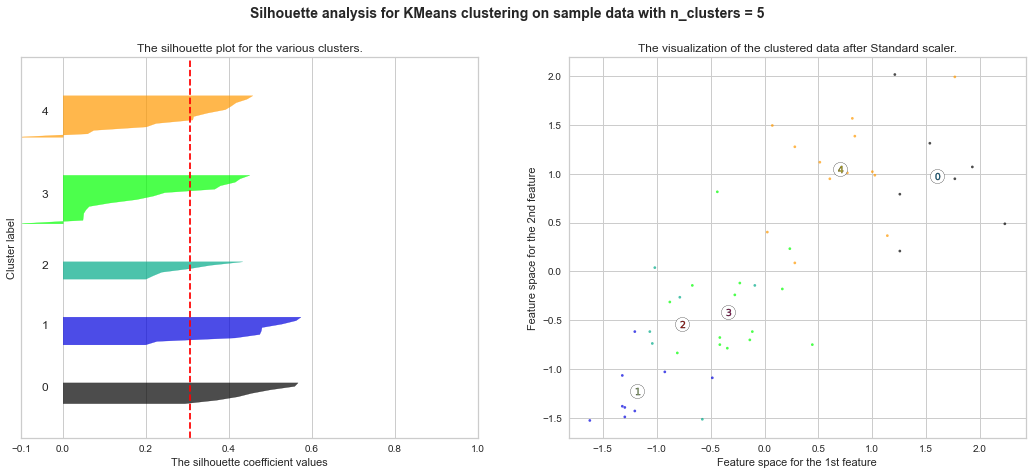

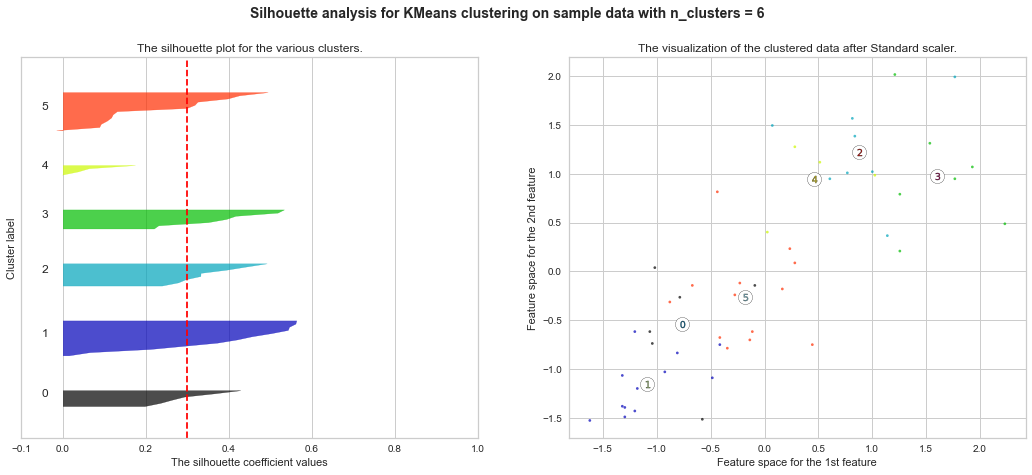

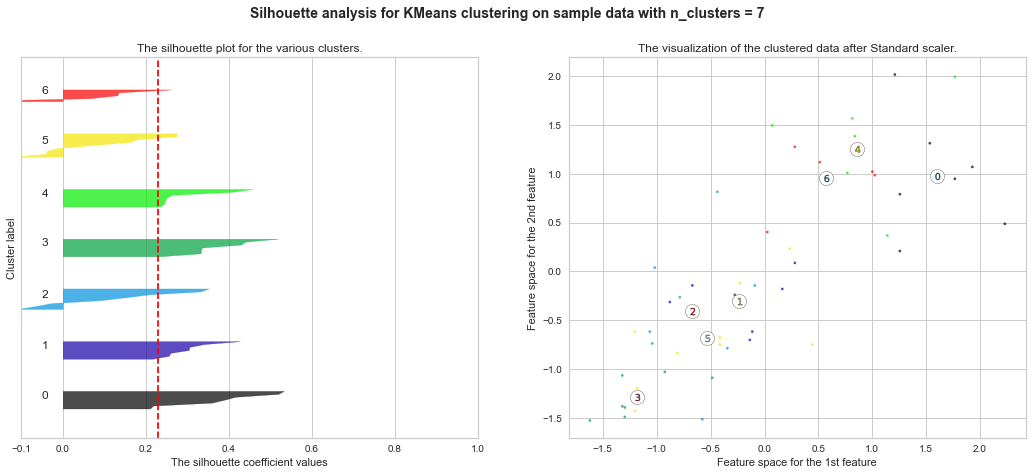

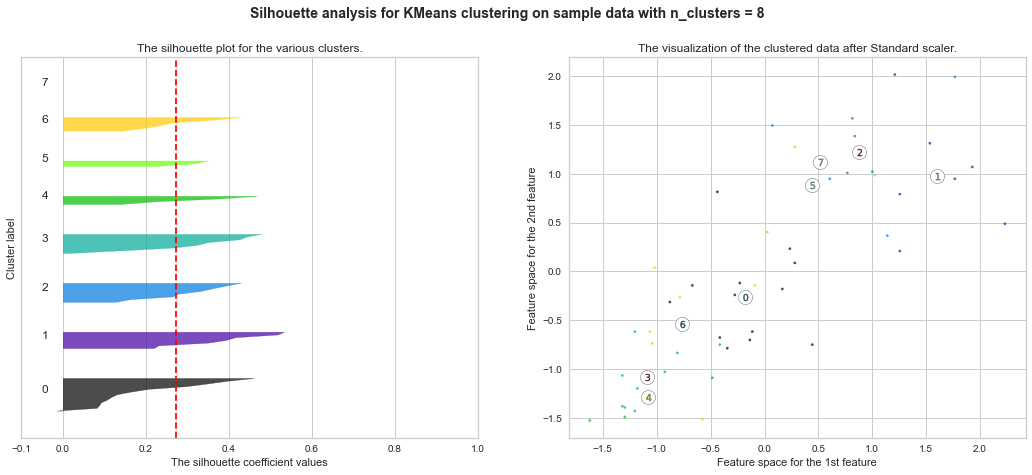

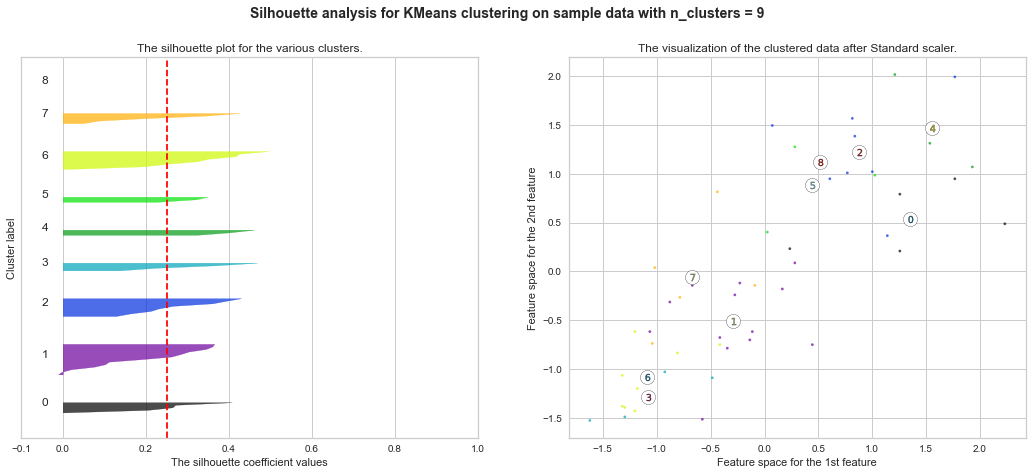

In [94]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

   
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# Build KMeans cluster algo using k=3 and standard scaler applied dataset

In [95]:
model_kmeans = KMeans(n_clusters=3,random_state=0,init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [96]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [97]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [98]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [99]:
model_kmeans.inertia_

80.0888613219962

In [100]:
df['Kmeans_label'] = model_kmeans.labels_

In [101]:
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [103]:
df[df['Kmeans_label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [104]:
df[df['Kmeans_label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [106]:
df[df['Kmeans_label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


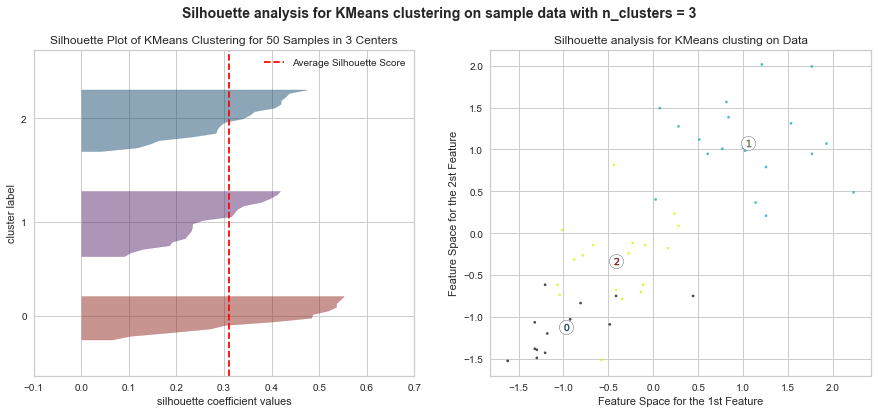

In [115]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, ax= ax1, colors = ['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float)/3)
ax2.scatter(std_df[:,0],std_df[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors1,edgecolor='k')

centers1 = model_kmeans.cluster_centers_

ax2.scatter(centers1[:,0],centers1[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
    
ax2.set_title('Silhouette analysis for KMeans clusting on Data')
ax2.set_xlabel('Feature Space for the 1st Feature')
ax2.set_ylabel('Feature Space for the 2st Feature')

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % 3),fontsize=14,fontweight ='bold')

sil_visualizer1.show()
plt.show()

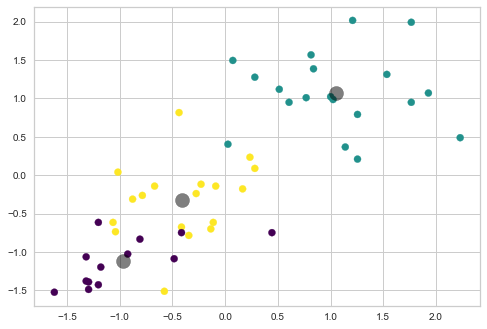

In [116]:
plt.scatter(std_df[:,0],std_df[:,1], c= model_kmeans.labels_,s = 50,cmap="viridis")

centers = model_kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

In [112]:
# Elbow method and silhouette score on minmax scaler applied data

In [117]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.690820
4,5,3.185022
5,6,2.844754
6,7,2.644902
7,8,2.324058
8,9,2.131918
9,10,1.919459


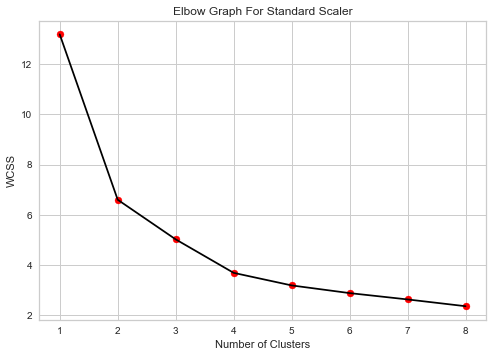

In [121]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph For Standard Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


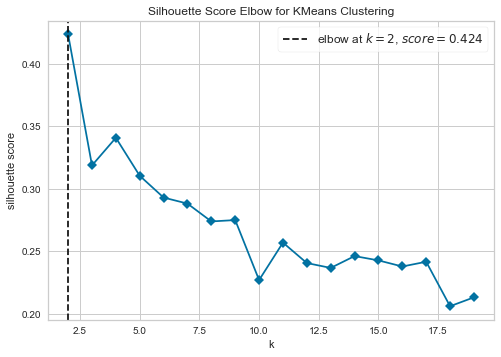

In [123]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [124]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31877550799979315
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3062742525752848
For n_clusters = 6 The average silhouette_score is : 0.2703558739205172
For n_clusters = 7 The average silhouette_score is : 0.23711197479268142
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


In [125]:
# As we can see, 2 clusters are having highers value 0.42, so we will build 2 clusters algo

# Build KMeans cluster algo using k=2 and MinMax scaler applied dataset

In [135]:
model_kmeans = KMeans(n_clusters=2,random_state=0,init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [136]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [137]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [138]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [139]:
model_kmeans.inertia_

6.596893867946196

In [140]:
df['Kmeans_label'] = model_kmeans.labels_

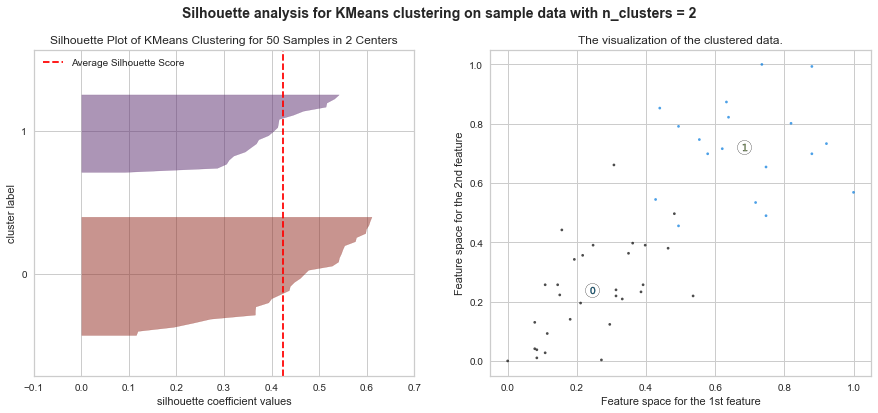

In [141]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

centers1 = model_kmeans.cluster_centers_

ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

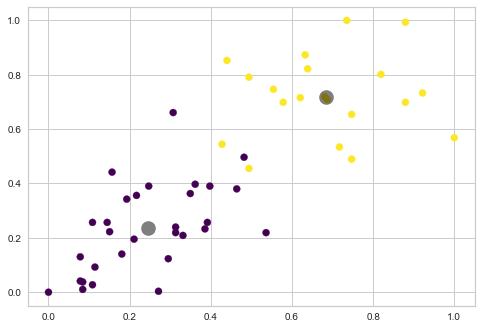

In [142]:
plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                        

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [143]:
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


# Hierarchical CLustering Algorithm

In [144]:
# Dendogram on MinMax Scaler Apllied dataset

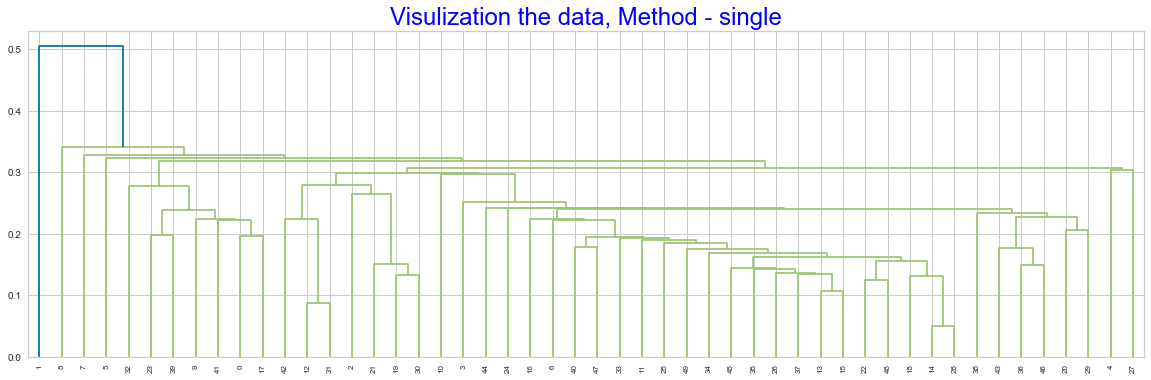

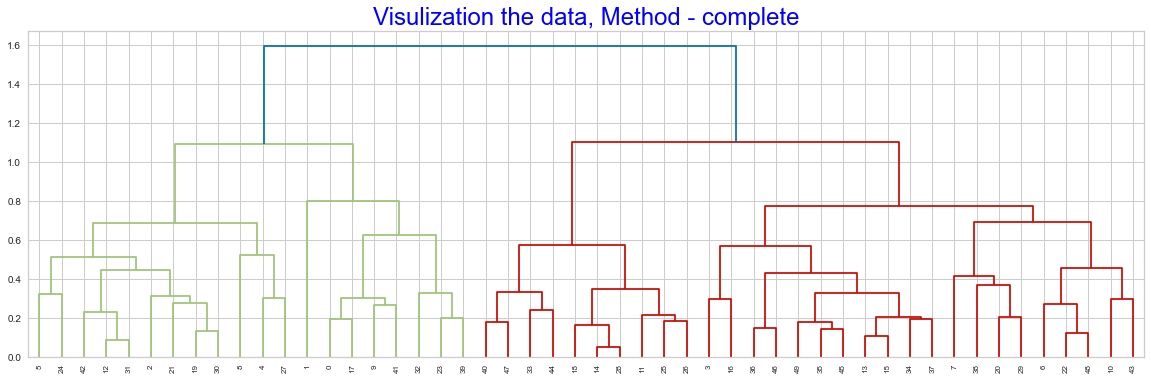

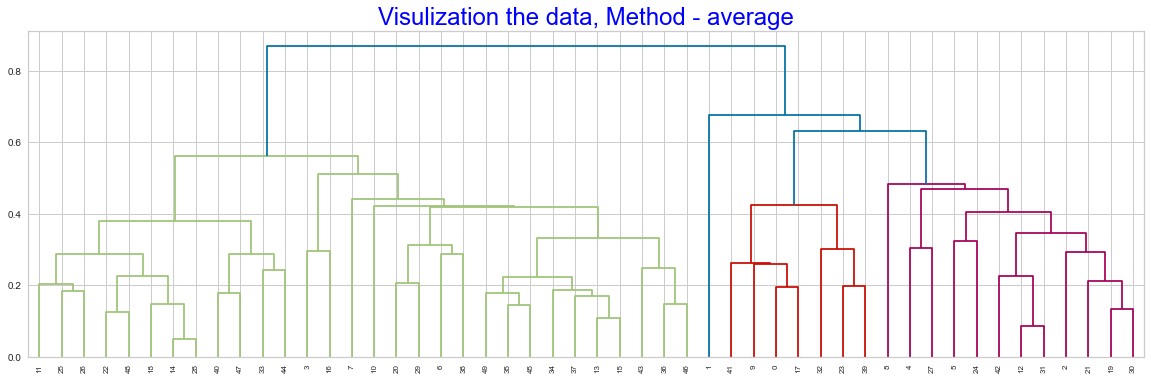

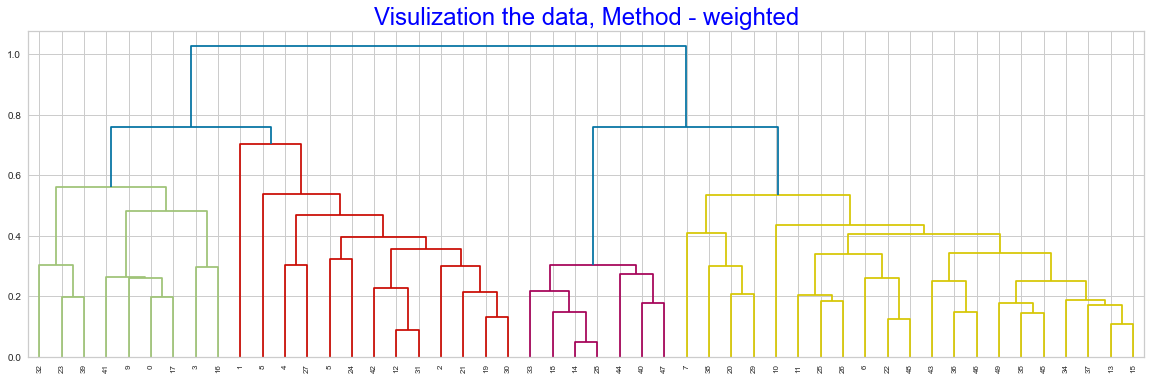

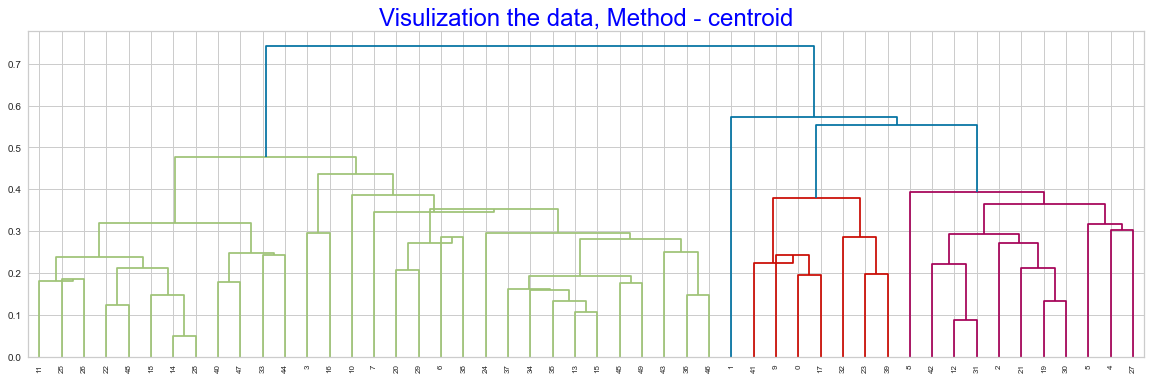

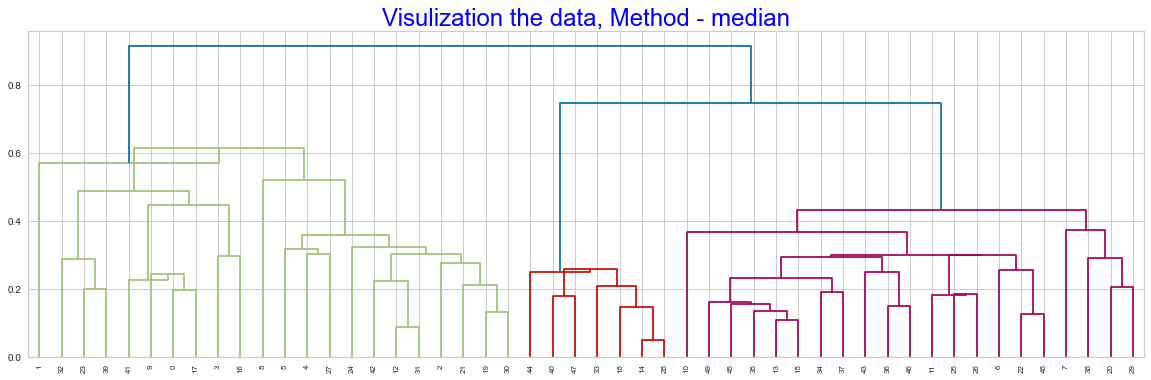

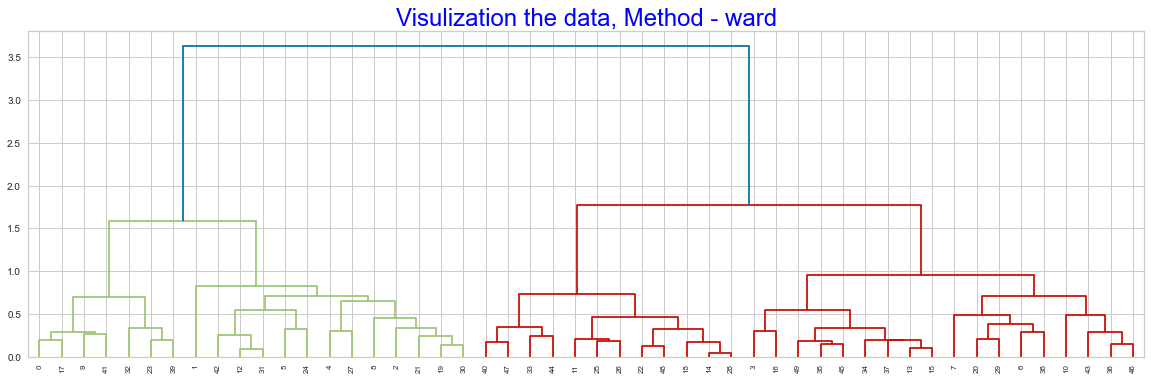

In [145]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(20,6))
    
    dict = {'fontsize':24,'fontweight':16, 'color':'blue'}
    plt.title('Visulization the data, Method - {}'.format(methods),fontdict = dict)
    dendrogram1 = sch.dendrogram(sch.linkage(minmax_df,method=methods,optimal_ordering=False))

In [146]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df,hie_labels1)
        print("for n_clusters =",n_clusters,"The Average Silhouette_Score with Linkage :",linkages,":",silhouette_score1)
    print()

for n_clusters = 2 The Average Silhouette_Score with Linkage : ward : 0.42364457559625074
for n_clusters = 2 The Average Silhouette_Score with Linkage : complete : 0.42364457559625074
for n_clusters = 2 The Average Silhouette_Score with Linkage : average : 0.42364457559625074
for n_clusters = 2 The Average Silhouette_Score with Linkage : single : 0.21033337025958482

for n_clusters = 3 The Average Silhouette_Score with Linkage : ward : 0.31916915428121284
for n_clusters = 3 The Average Silhouette_Score with Linkage : complete : 0.30877213909512063
for n_clusters = 3 The Average Silhouette_Score with Linkage : average : 0.35149572430421583
for n_clusters = 3 The Average Silhouette_Score with Linkage : single : 0.14223288708185441

for n_clusters = 4 The Average Silhouette_Score with Linkage : ward : 0.3298707379986785
for n_clusters = 4 The Average Silhouette_Score with Linkage : complete : 0.30607294424263076
for n_clusters = 4 The Average Silhouette_Score with Linkage : average : 0.36

In [147]:
# Dendrogram on standard scaler applied data

In [149]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df,hie_labels1)
        print("for n_clusters =",n_clusters,"The Average Silhouette_Score with Linkage :",linkages,":",silhouette_score1)
    print()

for n_clusters = 2 The Average Silhouette_Score with Linkage : ward : 0.4047944502519567
for n_clusters = 2 The Average Silhouette_Score with Linkage : complete : 0.4047944502519567
for n_clusters = 2 The Average Silhouette_Score with Linkage : average : 0.4084890326217641
for n_clusters = 2 The Average Silhouette_Score with Linkage : single : 0.234555987531598

for n_clusters = 3 The Average Silhouette_Score with Linkage : ward : 0.31036358174027895
for n_clusters = 3 The Average Silhouette_Score with Linkage : complete : 0.36924314190439733
for n_clusters = 3 The Average Silhouette_Score with Linkage : average : 0.34863679190476177
for n_clusters = 3 The Average Silhouette_Score with Linkage : single : 0.14582343625170263

for n_clusters = 4 The Average Silhouette_Score with Linkage : ward : 0.3370187183556962
for n_clusters = 4 The Average Silhouette_Score with Linkage : complete : 0.31595507426164543
for n_clusters = 4 The Average Silhouette_Score with Linkage : average : 0.3636819

# Agglomerative Clustering

In [150]:
agg_clustering = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [151]:
agg_clustering.n_clusters_

2

In [152]:
(sil(minmax_df,agg_clustering.labels_)*100).round(3)

42.364

In [153]:
df['Hierarchical_labels'] = agg_clustering.labels_

In [154]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Murder'>

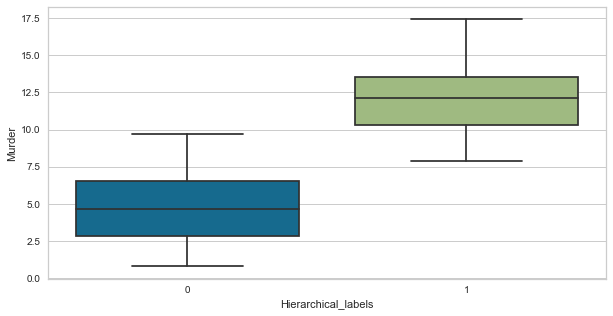

In [155]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels',y='Murder',data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Assault'>

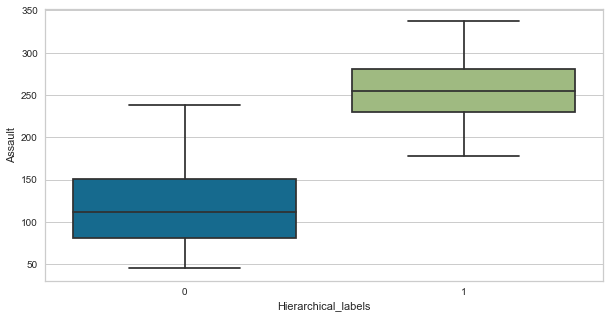

In [157]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels',y='Assault',data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Rape'>

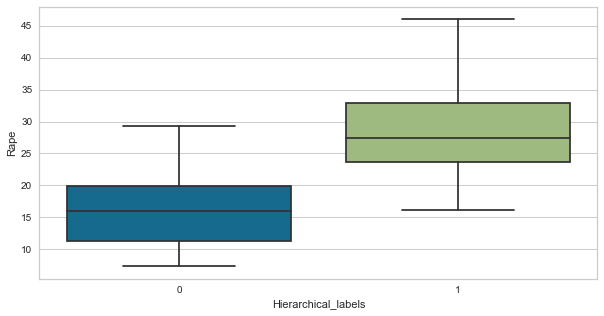

In [158]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels',y='Rape',data=df)

# DBSCAN

In [159]:
# DBSCAN on Standard Scaler data

In [161]:
from itertools import product

eps_values = np.arange(0.25,2,0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values,min_samples))

In [163]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0],min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df,DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the algo with respect to parameters combination


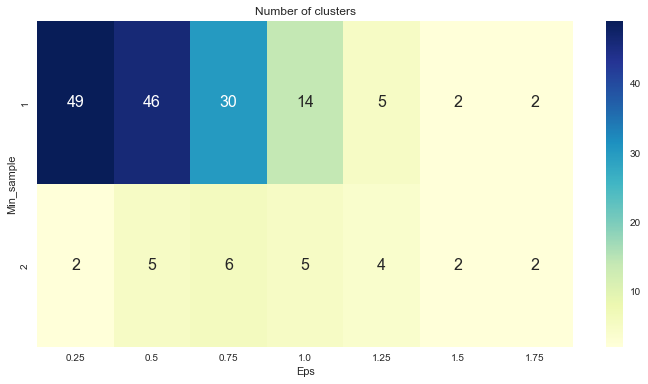

In [165]:
tmp = pd.DataFrame.from_records(DBSCAN_params,columns = ['Eps','Min_sample'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp,values='No_of_clusters',index='Min_sample',columns='Eps')

fig,ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16},cmap = "YlGnBu",ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were generated by the algo with respect to parameters combination')
plt.show()

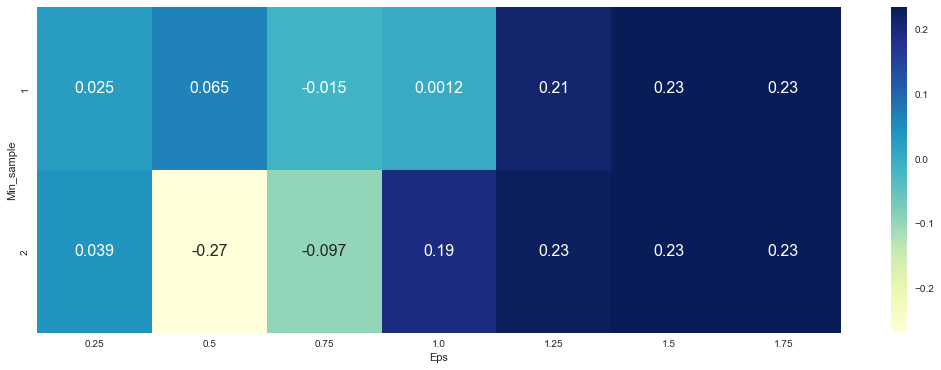

In [166]:
tmp = pd.DataFrame.from_records(DBSCAN_params,columns = ['Eps','Min_sample'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp,values='Sil_score',index='Min_sample',columns='Eps')

fig,ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16},cmap = "YlGnBu",ax=ax)
plt.show()

In [167]:
# Global maximum is 0.21 for epss=0.5 and min_samples = 2

In [168]:
epsilon = [0.25,0.5]
min_samples = [1,2]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 46 
average silhouette score= 0.0650


In [169]:
# DBSCAN on standard scaler dataset

In [171]:
dbscan = DBSCAN(eps=1.5, min_samples=1) 
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [172]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [173]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [174]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [175]:
# Silhouette Score for DBSCAN
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


In [176]:
# DBSCAN for minmax scaler dataset

In [177]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) 
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [178]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


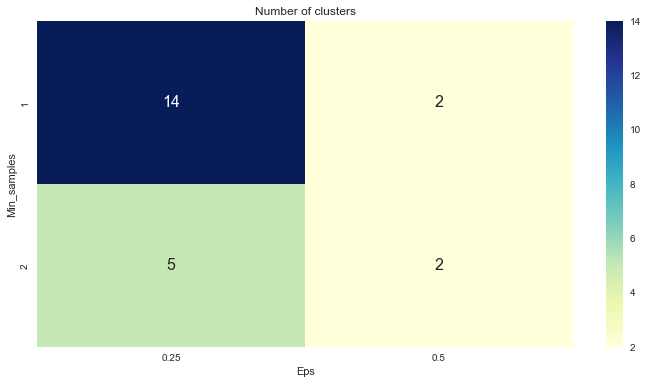

In [179]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

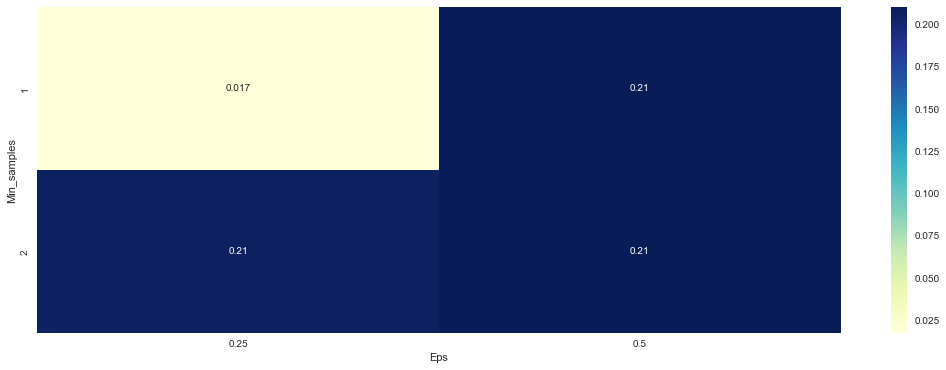

In [180]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [189]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
       
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

       
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [182]:
dbscan = DBSCAN(eps=0.5, min_samples=1) 
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [183]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [184]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [185]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [186]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [187]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,0.387755,1.0
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0


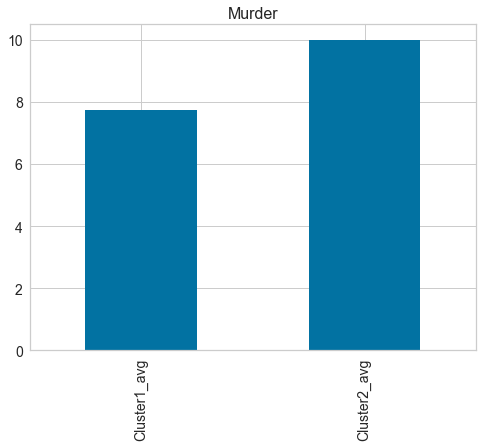

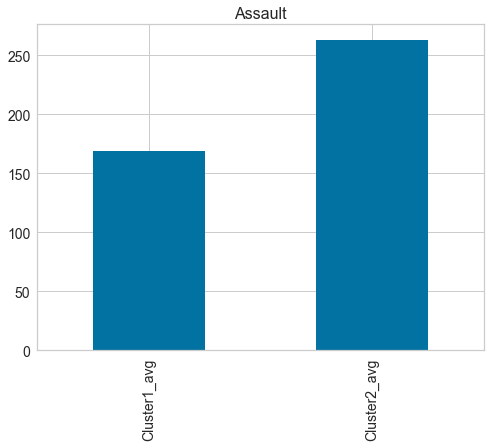

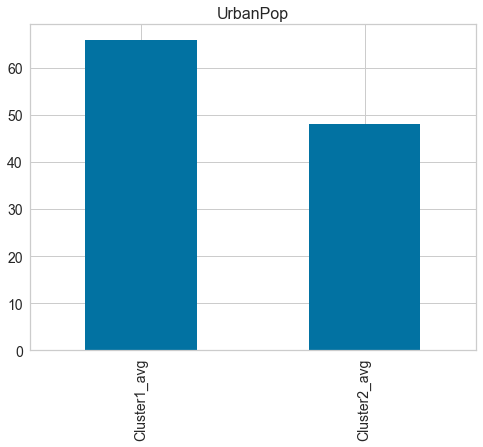

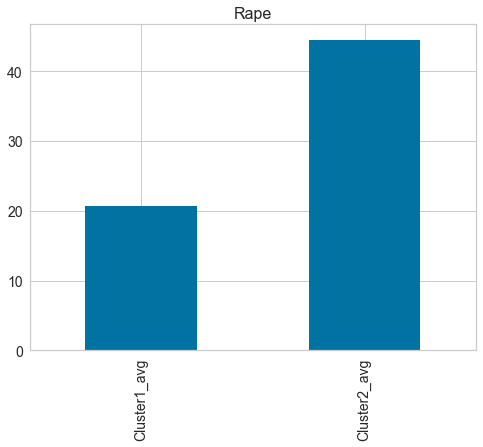

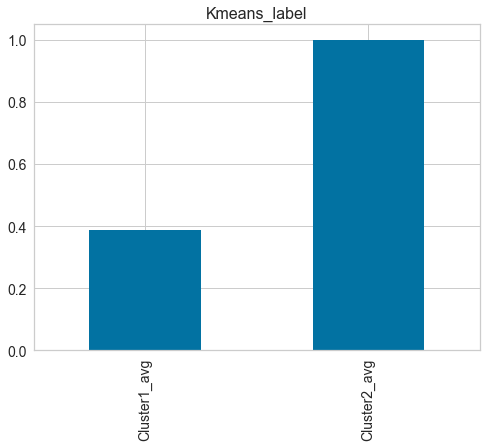

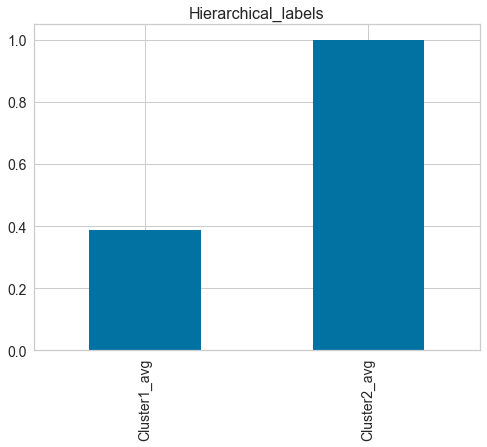

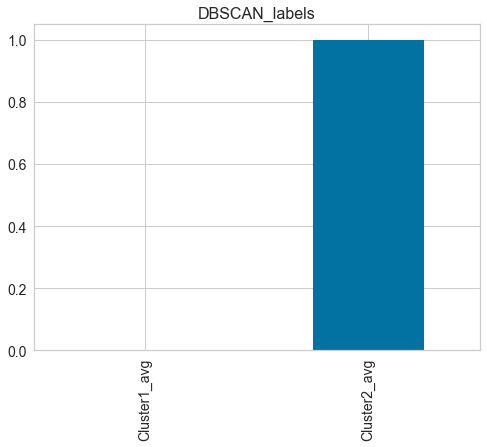

In [188]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()